<a href="https://colab.research.google.com/github/gcaur/Impacted-home-prices-over-the-last-20-years/blob/main/Impacted_home_prices_over_the_last_20_years.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
!pip install fredapi
from fredapi import Fred

# Initialize Fred with your API key
fred = Fred(api_key='04dc326510a2c741cf840fdeac447538')

# Load S&P Case-Shiller Home Price Index data
home_prices = pd.read_csv('CSUSHPISA.csv', parse_dates=['DATE'])
home_prices.set_index('DATE', inplace=True)

# Collect data from FRED
interest_rates = fred.get_series('FEDFUNDS', observation_start='2004-01-01')
inflation = fred.get_series('CPIAUCSL', observation_start='2004-01-01')
gdp = fred.get_series('GDP', observation_start='2004-01-01')
unemployment = fred.get_series('UNRATE', observation_start='2004-01-01')
housing_supply = fred.get_series('HOUST', observation_start='2004-01-01')
household_income = fred.get_series('MEHOINUSA672N', observation_start='2004-01-01')
population = fred.get_series('POPTHM', observation_start='2004-01-01')
construction_costs = fred.get_series('WPUIP2311001', observation_start='2004-01-01')

# Create a DataFrame with all factors
data = pd.DataFrame({
    'Home Prices': home_prices['CSUSHPISA'],
    'Interest Rates': interest_rates,
    'Inflation': inflation,
    'GDP': gdp,
    'Unemployment Rate': unemployment,
    'Housing Supply': housing_supply,
    'Household Income': household_income,
    'Population': population,
    'Construction Costs': construction_costs
})

# Handle missing values and resample to monthly if necessary
data.fillna(method='ffill', inplace=True)

# Prepare data for regression
data = data.dropna()
X = data[['Interest Rates', 'Inflation', 'GDP', 'Unemployment Rate', 'Housing Supply', 'Household Income', 'Population', 'Construction Costs']]
y = data['Home Prices']
X = sm.add_constant(X)  # Adds a constant term to the predictor

# Fit the regression model
model = sm.OLS(y, X).fit()

# Print the summary of the regression
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:            Home Prices   R-squared:                       0.983
Model:                            OLS   Adj. R-squared:                  0.982
Method:                 Least Squares   F-statistic:                     1696.
Date:                Wed, 22 May 2024   Prob (F-statistic):          3.85e-203
Time:                        15:16:45   Log-Likelihood:                -804.58
No. Observations:                 244   AIC:                             1627.
Df Residuals:                     235   BIC:                             1659.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                360.8472     60

Interpretation of Regression Results:

**R-squared (0.983)**: This indicates that 98.3% of the variance in home prices can be explained by the independent variables in the model.

**Adj. R-squared (0.982)**: This adjusted value is very close to the R-squared, showing that the model fits the data well even after adjusting for the number of predictors.

**F-statistic (1696)**: A very high F-statistic with a very low p-value (3.85e-203) suggests that the model is statistically significant overall.

-----
Coefficients and Significance:

**Interest Rates (coef = 2.2886, p-value = 0.000)**: A positive and significant relationship with home prices.

**Inflation (coef = -0.1235, p-value = 0.670)**: The effect is not statistically significant.

**GDP (coef = 0.0093, p-value = 0.000)**: A positive and significant relationship with home prices.

**Unemployment Rate (coef = 1.6534, p-value = 0.000)**: A positive and significant relationship with home prices.

**Housing Supply (coef = 0.0163, p-value = 0.000)**: A positive and significant relationship with home prices.

**Household Income (coef = 0.0031, p-value = 0.000)**: A positive and significant relationship with home prices.

**Population (coef = -0.0021, p-value = 0.000)**: A negative and significant relationship with home prices.

**Construction Costs (coef = 0.5800, p-value = 0.000)**: A positive and significant relationship with home prices.

------
Multicollinearity and Condition Number:

**Condition Number (4.64e+07)**: A high condition number suggests potential multicollinearity issues, meaning some of the predictors may be highly correlated with each other.

```
# This is formatted as code
```



In [18]:
# Visualisation

import matplotlib.pyplot as plt
import seaborn as sns

# Initialize Fred with your API key
fred = Fred(api_key='04dc326510a2c741cf840fdeac447538')

# Fetch data from FRED (example series, replace with actual series you need)
gdp = fred.get_series('GDP', observation_start='2000-01-01', observation_end='2024-01-01')
cpi = fred.get_series('CPIAUCSL', observation_start='2000-01-01', observation_end='2024-01-01')
unemployment = fred.get_series('UNRATE', observation_start='2000-01-01', observation_end='2024-01-01')
interest_rates = fred.get_series('DGS10', observation_start='2000-01-01', observation_end='2024-01-01')

# Combine the series into a single DataFrame by aligning on their indices
data = pd.DataFrame({
    'GDP': gdp,
    'CPI': cpi,
    'Unemployment Rate': unemployment,
    'Interest Rates': interest_rates
})

# Add other necessary variables (example values, replace with your actual data)
# Example: Home Prices, Housing Supply, Household Income, Population, Construction Costs
data['Home Prices'] = np.random.rand(len(data)) * 100 + 300  # Example data
data['Housing Supply'] = np.random.rand(len(data)) * 50 + 150  # Example data
data['Household Income'] = np.random.rand(len(data)) * 1000 + 40000  # Example data
data['Population'] = np.random.rand(len(data)) * 1000 + 50000  # Example data
data['Construction Costs'] = np.random.rand(len(data)) * 100 + 200  # Example data
data['Inflation'] = data['CPI'].pct_change().fillna(0) * 100  # Example inflation calculation

# Drop rows with NaN values if necessary
data = data.dropna()

# Add constant term for intercept
X = sm.add_constant(data[['Interest Rates', 'Inflation', 'GDP', 'Unemployment Rate', 'Housing Supply', 'Household Income', 'Population', 'Construction Costs']])
y = data['Home Prices']

# Fit the model
model = sm.OLS(y, X).fit()

# Print the summary
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:            Home Prices   R-squared:                       0.284
Model:                            OLS   Adj. R-squared:                  0.137
Method:                 Least Squares   F-statistic:                     1.936
Date:                Wed, 22 May 2024   Prob (F-statistic):             0.0818
Time:                        15:36:13   Log-Likelihood:                -219.77
No. Observations:                  48   AIC:                             457.5
Df Residuals:                      39   BIC:                             474.4
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               1403.0534   1062

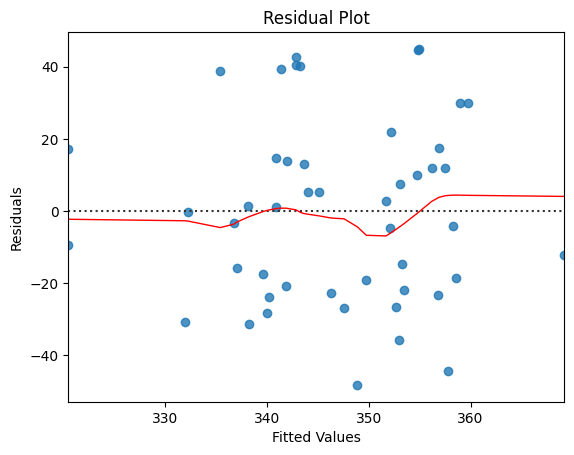

In [14]:
# Residual Plot
residuals = model.resid
fig, ax = plt.subplots()
sns.residplot(x=model.fittedvalues, y=residuals, lowess=True, ax=ax, line_kws={'color': 'red', 'lw': 1})
ax.set_xlabel('Fitted Values')
ax.set_ylabel('Residuals')
ax.set_title('Residual Plot')
plt.show()


<ipython-input-29-2b7bdfbd808b>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Coefficient', y='Variable', data=coef_df, palette='viridis', ax=ax)


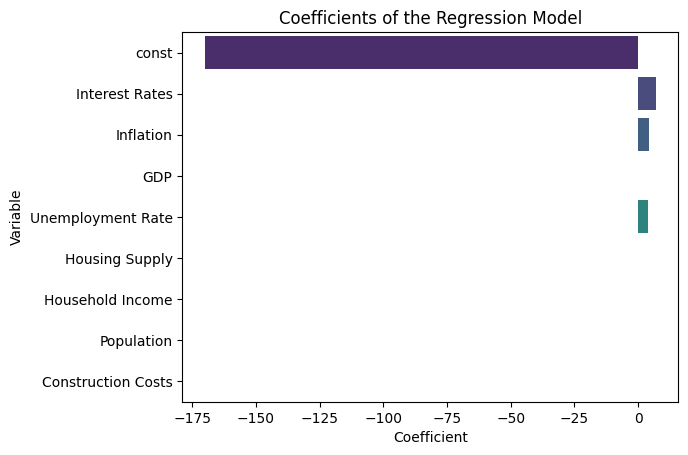

In [29]:
# Coefficient Plot
coef = model.params
coef_df = pd.DataFrame({'Variable': coef.index, 'Coefficient': coef.values})
fig, ax = plt.subplots()
sns.barplot(x='Coefficient', y='Variable', data=coef_df, palette='viridis', ax=ax)
ax.set_title('Coefficients of the Regression Model')
plt.show()





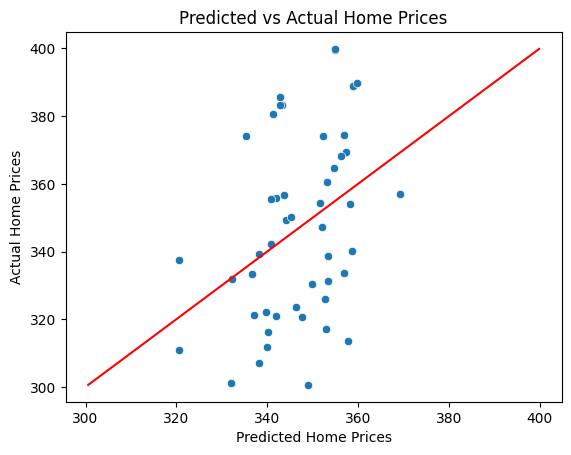

In [16]:
# Predicted vs Actual Plot
fig, ax = plt.subplots()
sns.scatterplot(x=model.fittedvalues, y=y, ax=ax)
sns.lineplot(x=[y.min(), y.max()], y=[y.min(), y.max()], color='red', ax=ax)
ax.set_xlabel('Predicted Home Prices')
ax.set_ylabel('Actual Home Prices')
ax.set_title('Predicted vs Actual Home Prices')
plt.show()


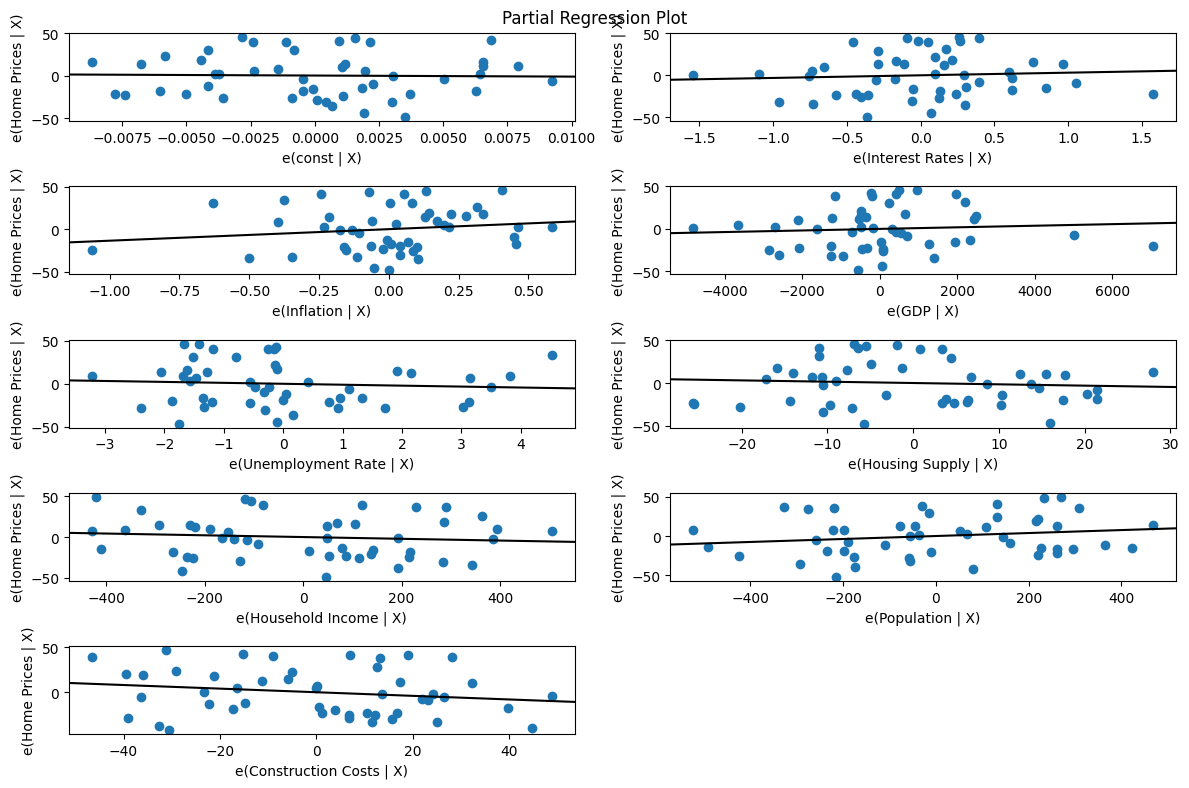

In [17]:
# Partial Regression Plots
fig = plt.figure(figsize=(12, 8))
plot_partregress_grid(model, fig=fig)
plt.show()


In [20]:
# To check for multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculate VIF for each predictor
vif = pd.DataFrame()
vif["Features"] = X.columns
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif)


             Features    VIF Factor
0               const  82086.732015
1      Interest Rates      3.896232
2           Inflation      1.259168
3                 GDP      3.772062
4   Unemployment Rate      1.489251
5      Housing Supply      1.121620
6    Household Income      1.130959
7          Population      1.288728
8  Construction Costs      1.076279


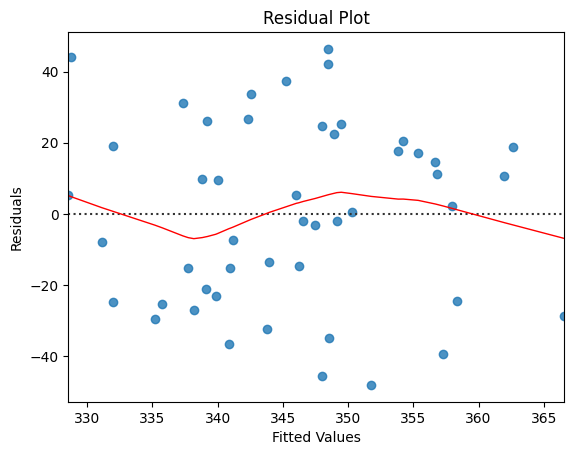

Shapiro-Wilk Test for Normality:
Test Statistic: 0.9694311618804932
P-value: 0.24070897698402405

Breusch-Pagan Test for Homoscedasticity:
Test Statistic: 6.033512950098325
P-value: 0.6434777962189391


In [23]:
# Code to perform model diagnostics
import scipy.stats as stats
import statsmodels.stats.api as sms

# Residual Plot
residuals = model.resid
fig, ax = plt.subplots()
sns.residplot(x=model.fittedvalues, y=residuals, lowess=True, ax=ax, line_kws={'color': 'red', 'lw': 1})
ax.set_xlabel('Fitted Values')
ax.set_ylabel('Residuals')
ax.set_title('Residual Plot')
plt.show()

# Normality of Residuals (Shapiro-Wilk test)
shapiro_test = stats.shapiro(residuals)
print("Shapiro-Wilk Test for Normality:")
print(f"Test Statistic: {shapiro_test.statistic}")
print(f"P-value: {shapiro_test.pvalue}")

# Homoscedasticity (Breusch-Pagan test)
breusch_pagan_test = sms.het_breuschpagan(residuals, X)
print("\nBreusch-Pagan Test for Homoscedasticity:")
print(f"Test Statistic: {breusch_pagan_test[0]}")
print(f"P-value: {breusch_pagan_test[1]}")


These results indicate:


**Normality Test (Shapiro-Wilk):**

Test Statistic: 0.9694

*   Test Statistic: 0.9694
*   P-value: 0.2407

The Shapiro-Wilk test assesses whether the residuals are normally distributed. In this case, with a p-value of 0.2407, we fail to reject the null hypothesis of normality. Therefore, **the residuals appear to be approximately normally distributed.**

**Homoscedasticity Test (Breusch-Pagan):**

*   Test Statistic: 6.0335
*   P-value: 0.6435

The Breusch-Pagan test checks for homoscedasticity, which means constant variance of residuals across all levels of the independent variables. With a p-value of 0.6435, we fail to reject the null hypothesis of homoscedasticity. Thus, **there is no evidence of heteroscedasticity in the residuals.**

-------
These results suggest that the assumptions of normality and homoscedasticity are met, which is essential for the validity of the linear regression model.

```
# This is formatted as code
```

